#  SPAM CLASSIFIER
Here we are going to build a simple email spam classifier using naive_bayes and svm

The dataset originates from [kaggle.](https://www.kaggle.com/venky73/spam-mails-dataset)

## 1) Importing libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re

##  2)Exploratory Data Analysis

### loading dataset

In [2]:
df = pd.read_csv('spamds.csv')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df1 = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df1.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df1.shape

(5572, 2)

there are 5572 different emails in dataset

In [6]:
df1.groupby('v1').count()

,v2
v1,
ham,4825
spam,747


out of 5572 emails, 4825 are classified as ha, and 747 are classifed as spam

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<AxesSubplot:xlabel='v1', ylabel='count'>

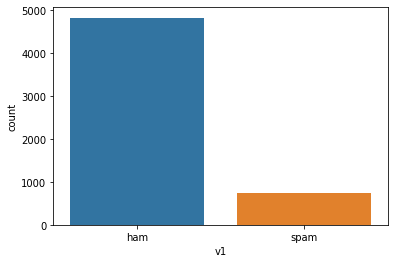

In [8]:
sns.countplot(x='v1',data=df1)

### Downloading stopwords
A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages.

In [9]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sudha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

before data preprocessing:

In [10]:
df1['v2'][4]

"Nah I don't think he goes to usf, he lives around here though"

### Text Data Preprocessing

1) Removing punctuation

2) Tokenization

3) removing stopwords and stemming

Tokenization:

Tokenization is the process of turning sensitive data into nonsensitive data called "tokens" that can be used in a database or internal system without bringing it into scope.

stemming:
 
Stemming is a process where words are reduced to a root by removing inflection through dropping unnecessary characters, usually a suffix. 

In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(df1)):
  e_mail = re.sub('[^a-zA-Z]', ' ', df1['v2'][i])
  e_mail = e_mail.split()
  ps = PorterStemmer()
  e_mail = [ps.stem(word) for word in e_mail if not word in set(stopwords.words('english'))]
  e_mail = ' '.join(e_mail)
  corpus.append(e_mail)

after preprocessing:

In [12]:
corpus[4]

'nah i think goe usf live around though'

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
count_vectorizer = CountVectorizer()
counts = count_vectorizer.fit_transform(corpus).toarray()
counts

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### One-hot encoding
To encode categorical data to numeric data

In [15]:
con_df = pd.get_dummies(df1[['v1']],drop_first=True)
con_df.head()

,v1_spam
0,0
1,0
2,1
3,0
4,0


In [16]:
df2=df1.drop(['v1'],axis=1)
dfinal=pd.concat([df2,con_df],axis=1)
dfinal.head()

,v2,v1_spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [17]:
df1.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 3) Modeling
before training let's seperate features and labels

In [18]:
y = dfinal.v1_spam
x = counts


###  train_test splitting 

splitting data for training and testing

80% train data and 20% test data

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4457, 6304)
(4457,)
(1115, 6304)
(1115,)


### Training and predicting
here we use naive_bayes and svm to train on data.

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
classifier = MultinomialNB()
classifier.fit(X_train,Y_train)
Y_train_predicted=classifier.predict(X_train)
Y_test_predicted=classifier.predict(X_test)
print("Train set accuracy: ",accuracy_score(Y_train,Y_train_predicted)*100)
print("Test set accuracy : ",accuracy_score(Y_test,Y_test_predicted)*100)

Train set accuracy:  99.34933811981153
Test set accuracy :  98.20627802690582


In [22]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,Y_train)
Y_train_predicted=classifier.predict(X_train)
Y_test_predicted=classifier.predict(X_test)
print("Train set accuracy: ",accuracy_score(Y_train,Y_train_predicted)*100)
print("Test set accuracy : ",accuracy_score(Y_test,Y_test_predicted)*100)

Train set accuracy:  99.34933811981153
Test set accuracy :  98.20627802690582


### confusion matrix

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes.

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train,Y_train_predicted)


array([[3836,   13],
       [  16,  592]], dtype=int64)

In [24]:
confusion_matrix(Y_test,Y_test_predicted)

array([[962,  14],
       [  6, 133]], dtype=int64)

## 4)Pickle Dump

In [25]:
import pickle
pickle.dump(classifier,open('spam_model.pkl','wb'))

In [27]:
pickle.dump(count_vectorizer ,open('count.pkl','wb'))